[0.         1.47430366 0.96875793 0.36690336 1.86900038 0.03410132
 0.26590425]
The angles of each joints are :  [84, 55, 21, 107, 1, 15]
Computed position: [ 0.7  0.3 -0.2], 
Original position : [0.7, 0.3, -0.2]
Computed position (readable) : ['0.70', '0.30', '-0.20']


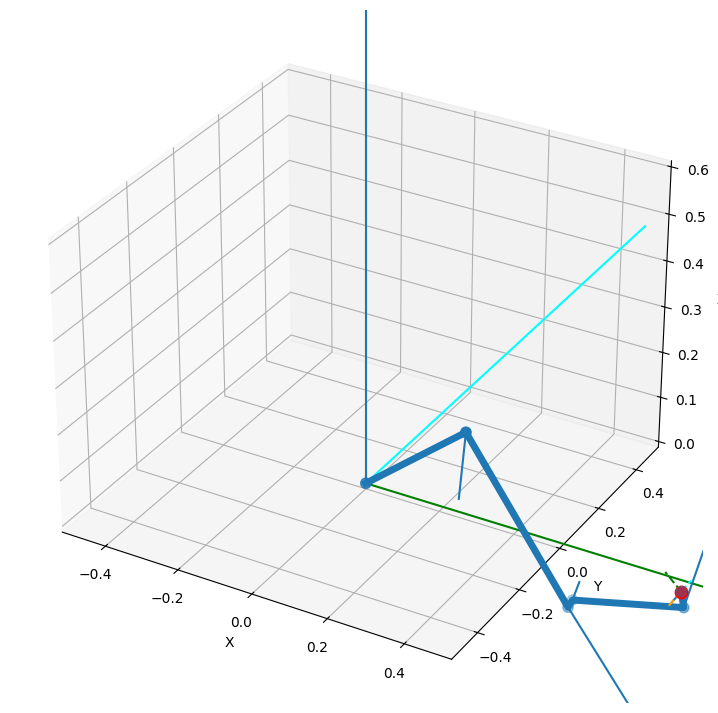

In [2]:
import ikpy.chain
import ikpy.utils.plot as plot_utils

import numpy as np
import time
import math

import ipywidgets as widgets
import serial

my_chain = ikpy.chain.Chain.from_urdf_file("Robot/robo.urdf",active_links_mask=[False, True, True, True, True, True, True])

target_position = [0.7, 0.3, -0.2]
target_orientation = [0, 1, 0]

ik = my_chain.inverse_kinematics(target_position)
ik = my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Y")
print(ik)
print("The angles of each joints are : ", list(map(lambda r: int(math.degrees(r)), ik.tolist()))[1:])
# print("The angles of each joints are : ", list(map(lambda r:math.degrees(r),ik.tolist())))
# print(my_chain)
computed_position = my_chain.forward_kinematics(ik)
# print
print("Computed position: %s, \nOriginal position : %s" % (computed_position[:3, 3], target_position))
print("Computed position (readable) : %s" % [ '%.2f' % elem for elem in computed_position[:3, 3] ])

# %matplotlib widget
#%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
fig.set_figheight(9)  
fig.set_figwidth(13)  
my_chain.plot(ik, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0, 0.6)
plt.ion()
